In [216]:
import pandas as pd
import numpy as np
from datetime import datetime as dt
from datetime import date
from sklearn.preprocessing import scale
from sklearn.preprocessing import minmax_scale
from sklearn import mixture
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


from sklearn.preprocessing import MinMaxScaler


In [237]:
final_cluster_clean=pd.read_csv("final_cluster_clean_2.csv")
player_feature_df=final_cluster_clean.drop("playersID",axis=1)
player_feature_df=player_feature_df.drop("Unnamed: 0",axis=1)
player_feature_df.head()

,Ability,Character_Level,Grenade,KDA,Lightlevel,Melee,Super,assists,avg_score_per_life,deaths,...,Linear Fusion Rifle,Pulse Rifle,Rocket Launcher,Scout Rifle,Shotgun,Sidearm,Sniper Rifle,Submachine Gun,Sword,Trace Rifle
0,0.0,25.0,0.0,0.800000,335.0,0.0,0.0,2.0,0.000000,10.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,25.0,1.0,0.653846,335.0,0.0,0.0,5.0,1.214286,13.0,...,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,25.0,4.0,2.857143,327.0,1.0,1.0,6.0,5.125000,7.0,...,0.0,0.0,0.0,3.0,0.0,0.0,0.0,7.0,0.0,0.0
3,0.0,25.0,0.0,7.000000,332.0,0.0,2.0,6.0,1.333333,2.0,...,0.0,0.0,0.0,4.0,0.0,5.0,0.0,0.0,0.0,0.0
4,0.0,20.0,0.0,1.516667,302.5,0.0,1.0,3.0,0.931818,6.5,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0


In [238]:
len(final_cluster_clean)

5551

In [239]:
scaler = MinMaxScaler() 
scaled_values = scaler.fit_transform(player_feature_df)
new_x = pd.DataFrame(scaled_values)
new_x.columns = player_feature_df.columns

In [240]:
def my_normal(x):
    """normalize the predictors"""
    
    scaler = MinMaxScaler() 
    scaled_values = scaler.fit_transform(x)
    new_x = pd.DataFrame(scaled_values)
    new_x.columns = x.columns

    return new_x

In [241]:
norm_player_feature_df = my_normal(player_feature_df)

In [242]:
norm_player_feature_df.head()

,Ability,Character_Level,Grenade,KDA,Lightlevel,Melee,Super,assists,avg_score_per_life,deaths,...,Linear Fusion Rifle,Pulse Rifle,Rocket Launcher,Scout Rifle,Shotgun,Sidearm,Sniper Rifle,Submachine Gun,Sword,Trace Rifle
0,0.0,1.000000,0.0,0.032000,1.000000,0.000,0.000000,0.1250,0.000000,0.40,...,0.0,0.0,0.0,0.000000,0.0000,0.000000,0.0,0.000000,0.0,0.0
1,0.0,1.000000,0.2,0.026154,1.000000,0.000,0.000000,0.3125,0.130102,0.52,...,0.0,0.0,0.0,0.019300,0.0000,0.000000,0.0,0.000000,0.0,0.0
2,0.0,1.000000,0.8,0.114286,0.976119,0.125,0.140351,0.3750,0.549107,0.28,...,0.0,0.0,0.0,0.028951,0.0000,0.000000,0.0,0.194444,0.0,0.0
3,0.0,1.000000,0.0,0.280000,0.991045,0.000,0.280702,0.3750,0.142857,0.08,...,0.0,0.0,0.0,0.038601,0.0000,0.384615,0.0,0.000000,0.0,0.0
4,0.0,0.791667,0.0,0.060667,0.902985,0.000,0.140351,0.1875,0.099838,0.26,...,0.0,0.0,0.0,0.009650,0.0625,0.000000,0.0,0.000000,0.0,0.0


In [243]:
len(norm_player_feature_df)

5551

In [244]:
def my_scaler(x):
    """standardize the predictors"""
    
    new_x = pd.DataFrame(minmax_scale(x, axis=0, with_mean=True, with_std=True, copy=True))
    new_x.columns = x.columns
    
    return new_x

In [245]:
norm_player_feature_df.head()

,Ability,Character_Level,Grenade,KDA,Lightlevel,Melee,Super,assists,avg_score_per_life,deaths,...,Linear Fusion Rifle,Pulse Rifle,Rocket Launcher,Scout Rifle,Shotgun,Sidearm,Sniper Rifle,Submachine Gun,Sword,Trace Rifle
0,0.0,1.000000,0.0,0.032000,1.000000,0.000,0.000000,0.1250,0.000000,0.40,...,0.0,0.0,0.0,0.000000,0.0000,0.000000,0.0,0.000000,0.0,0.0
1,0.0,1.000000,0.2,0.026154,1.000000,0.000,0.000000,0.3125,0.130102,0.52,...,0.0,0.0,0.0,0.019300,0.0000,0.000000,0.0,0.000000,0.0,0.0
2,0.0,1.000000,0.8,0.114286,0.976119,0.125,0.140351,0.3750,0.549107,0.28,...,0.0,0.0,0.0,0.028951,0.0000,0.000000,0.0,0.194444,0.0,0.0
3,0.0,1.000000,0.0,0.280000,0.991045,0.000,0.280702,0.3750,0.142857,0.08,...,0.0,0.0,0.0,0.038601,0.0000,0.384615,0.0,0.000000,0.0,0.0
4,0.0,0.791667,0.0,0.060667,0.902985,0.000,0.140351,0.1875,0.099838,0.26,...,0.0,0.0,0.0,0.009650,0.0625,0.000000,0.0,0.000000,0.0,0.0


In [246]:
from sklearn.cluster import KMeans

In [247]:
model = KMeans(n_clusters=6, n_init=30)

In [248]:
model.fit(norm_player_feature_df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=6, n_init=30, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [249]:
from sklearn.cluster import KMeans

ks = range(3, 10)
inertias = []

for k in ks:
    # Create a KMeans instance with k clusters: model
    model_1 = KMeans(n_clusters=k, n_init=30)

    # Fit model to samples
    model_1.fit(player_feature_df)

    # Append the inertia to the list of inertias
    inertias.append(model_1.inertia_)

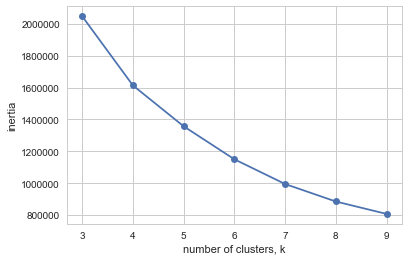

In [228]:
import matplotlib.pyplot as plt

# Plot ks vs inertias
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

In [250]:
model.labels_

array([2, 3, 3, ..., 1, 2, 3], dtype=int32)

In [251]:
# Get the predicted group
pd.Series(model.predict(norm_player_feature_df)).value_counts()

2    2351
0    1023
1     890
3     864
5     340
4      83
dtype: int64

In [252]:
norm_player_feature_df = norm_player_feature_df.copy()

In [253]:
norm_player_feature_df['cluster'] = model.predict(norm_player_feature_df)

In [254]:
norm_player_feature_df.head()

,Ability,Character_Level,Grenade,KDA,Lightlevel,Melee,Super,assists,avg_score_per_life,deaths,...,Pulse Rifle,Rocket Launcher,Scout Rifle,Shotgun,Sidearm,Sniper Rifle,Submachine Gun,Sword,Trace Rifle,cluster
0,0.0,1.000000,0.0,0.032000,1.000000,0.000,0.000000,0.1250,0.000000,0.40,...,0.0,0.0,0.000000,0.0000,0.000000,0.0,0.000000,0.0,0.0,2
1,0.0,1.000000,0.2,0.026154,1.000000,0.000,0.000000,0.3125,0.130102,0.52,...,0.0,0.0,0.019300,0.0000,0.000000,0.0,0.000000,0.0,0.0,3
2,0.0,1.000000,0.8,0.114286,0.976119,0.125,0.140351,0.3750,0.549107,0.28,...,0.0,0.0,0.028951,0.0000,0.000000,0.0,0.194444,0.0,0.0,3
3,0.0,1.000000,0.0,0.280000,0.991045,0.000,0.280702,0.3750,0.142857,0.08,...,0.0,0.0,0.038601,0.0000,0.384615,0.0,0.000000,0.0,0.0,5
4,0.0,0.791667,0.0,0.060667,0.902985,0.000,0.140351,0.1875,0.099838,0.26,...,0.0,0.0,0.009650,0.0625,0.000000,0.0,0.000000,0.0,0.0,2


In [255]:
norm_player_feature_df["cluster"].value_counts()

2    2351
0    1023
1     890
3     864
5     340
4      83
Name: cluster, dtype: int64

In [256]:
def plot_cluster_result(df, cluster_colname):
    """ploting all cluster in a single guitar tab plot"""    
    
    sns.set(style="whitegrid")

    # "Melt" the dataset to "long-form" or "tidy" representation
    df = pd.melt(df, cluster_colname, var_name="measurement")

    # Initialize the figure
    f, ax = plt.subplots()
    sns.despine(bottom=True, left=True)

#     # Show each observation with a scatterplot
#     sns.stripplot(x="value", y="measurement", hue=cluster_colname,
#                   data=df, dodge=True, jitter=True,
#                   alpha=.25, zorder=1)
    
    # Show the conditional means
    sns.pointplot(x="value", y="measurement", hue=cluster_colname,
                  data=df, dodge=.532, join=True, palette="dark",
                  markers="d", scale=.75, ci=None)

    # Improve the legend 
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles[0:], labels[0:], title=cluster_colname,
              handletextpad=0, columnspacing=1,
              loc="lower right", ncol=3, frameon=True)

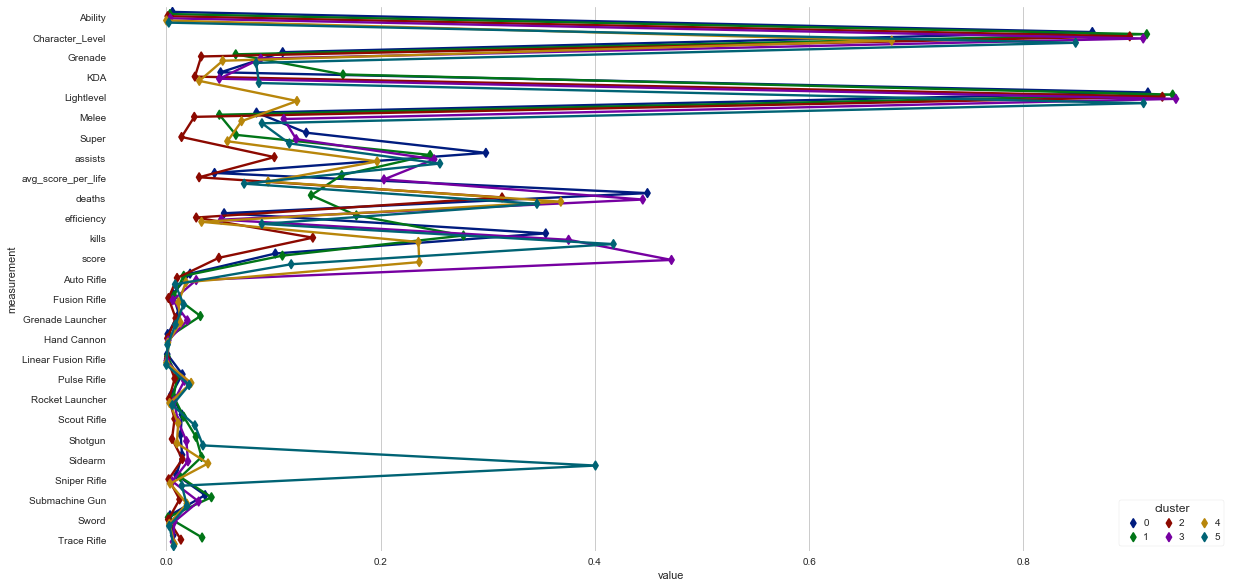

In [267]:
#Result Visualization 1
plt.rcParams["figure.figsize"] = (20,10)
plot_cluster_result(norm_player_feature_df, 'cluster')

In [268]:
def plot_single_cluster(df, cluster_colname, cluster_num, color="#3160D6"):
    """plot guitar tab plot for a single cluster"""
    
    sns.set(style="whitegrid")

    # filter cluster data
    df = df[df[cluster_colname]==cluster_num].copy()
        
    # "Melt" the dataset to "long-form" or "tidy" representation
    df = pd.melt(df, cluster_colname, var_name="measurement")

    # Initialize the figure
    f, ax = plt.subplots()
    sns.despine(bottom=True, left=True)

    # Show the conditional means
    sns.pointplot(x="value", y="measurement", 
                  data=df, dodge=.532, join=False, 
                  markers="d", scale=.75, ci=None, color=color)#palette="dark",

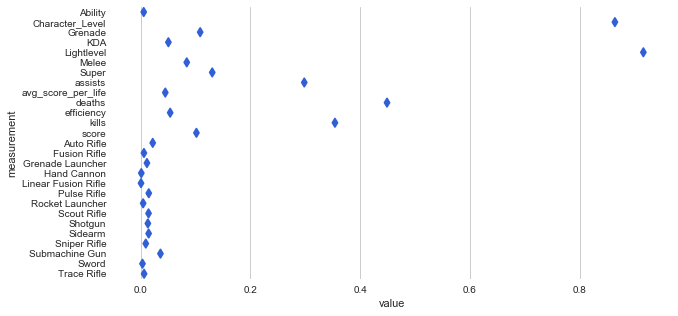

In [269]:
plt.rcParams["figure.figsize"] = (10,5)
plot_single_cluster(norm_player_feature_df, 'cluster', 0)

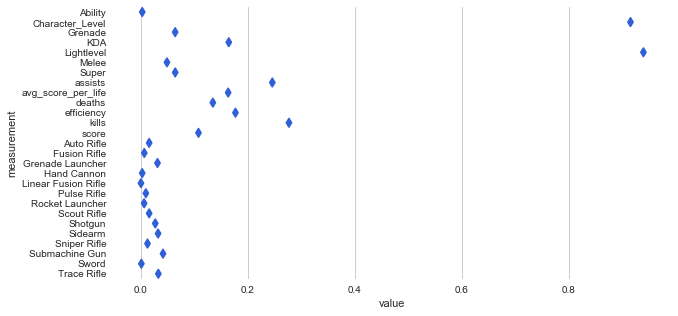

In [275]:
plt.rcParams["figure.figsize"] = (10,5)
plot_single_cluster(norm_player_feature_df, 'cluster', 1)

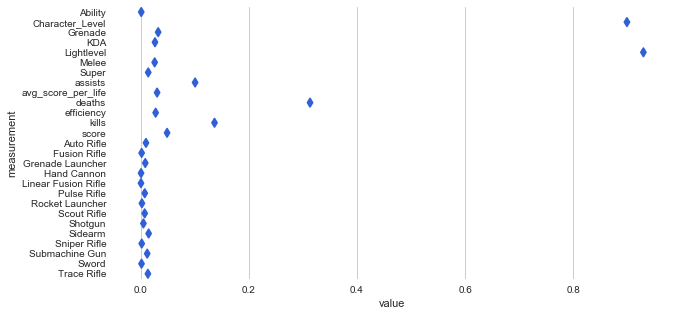

In [276]:
plt.rcParams["figure.figsize"] = (10,5)
plot_single_cluster(norm_player_feature_df, 'cluster', 2)

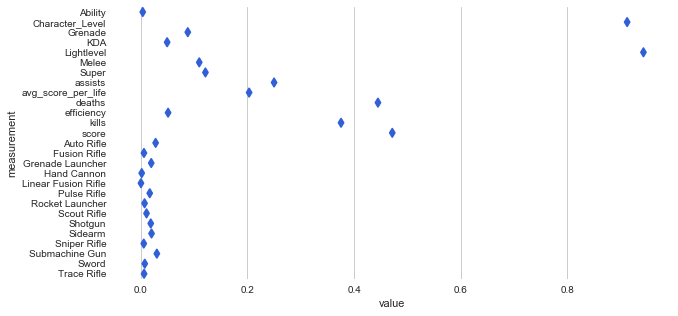

In [277]:
plt.rcParams["figure.figsize"] = (10,5)
plot_single_cluster(norm_player_feature_df, 'cluster', 3)

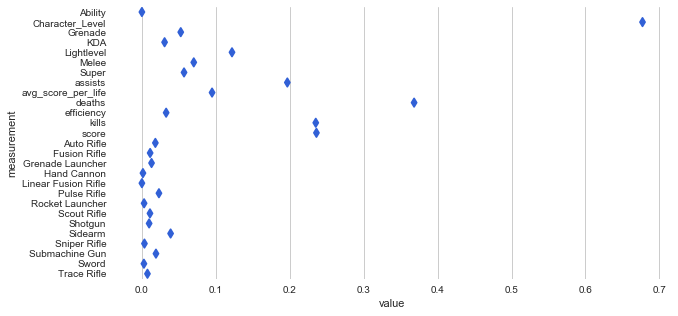

In [278]:
plt.rcParams["figure.figsize"] = (10,5)
plot_single_cluster(norm_player_feature_df, 'cluster', 4)

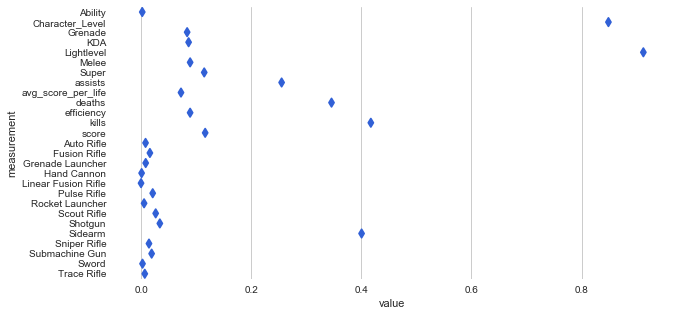

In [279]:
plt.rcParams["figure.figsize"] = (10,5)
plot_single_cluster(norm_player_feature_df, 'cluster', 5)

In [280]:
def plot_cluster_facet(df, cluster_colname):
    """plot guitar tab plot for a single cluster"""
    
    sns.set(style="whitegrid")
        
    # "Melt" the dataset to "long-form" or "tidy" representation
    df = pd.melt(df, cluster_colname, var_name="measurement")

    # Show the conditional means
    g = sns.factorplot(x="value", y="measurement",
                   col="cluster",
                    data=df, kind="point",
                    dodge=False,
                    size=4, aspect=.7);#hue="smoker", 

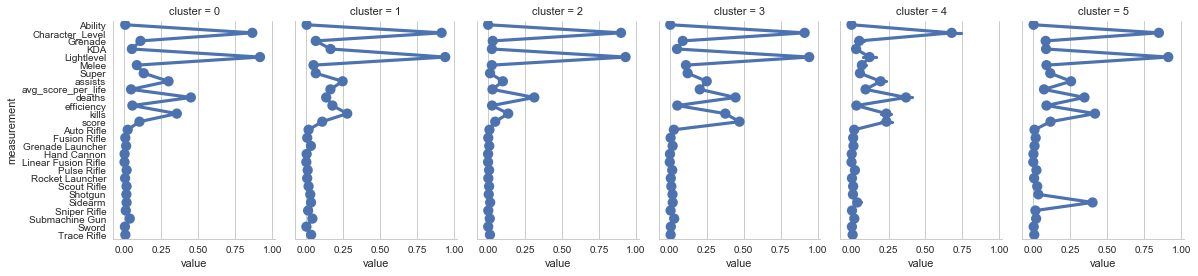

In [281]:
plot_cluster_facet(norm_player_feature_df, 'cluster')

In [78]:
# # Initialize plotting library and functions for 3D scatter plots 
# from sklearn.externals import six
# import pandas as pd
# import numpy as np
# import argparse
# import json
# import re
# import os
# import sys
# import plotly
# import plotly.graph_objs as go
# #plotly.offline.init_notebook_mode()


In [282]:
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

print(__version__) # requires version >= 1.9.0

2.5.0


In [283]:
norm_player_feature_df.columns

Index(['Ability', 'Character_Level', 'Grenade', 'KDA', 'Lightlevel', 'Melee',
       'Super', 'assists', 'avg_score_per_life', 'deaths', 'efficiency',
       'kills', 'score', 'Auto Rifle', 'Fusion Rifle', 'Grenade Launcher',
       'Hand Cannon', 'Linear Fusion Rifle', 'Pulse Rifle', 'Rocket Launcher',
       'Scout Rifle', 'Shotgun', 'Sidearm', 'Sniper Rifle', 'Submachine Gun',
       'Sword', 'Trace Rifle', 'cluster'],
      dtype='object')

In [284]:
# Visualize cluster shapes in 3d.
df=norm_player_feature_df[['Ability','Character_Level','KDA','cluster']]
df.columns=['Ability','Character_Level','KDA','y']

cluster1=df.loc[df['y'] == 0]
cluster2=df.loc[df['y'] == 1]
cluster3=df.loc[df['y'] == 2]
cluster4=df.loc[df['y'] == 3]
cluster5=df.loc[df['y'] == 4]
cluster6=df.loc[df['y'] == 5]

scatter1 = dict(
    mode = "markers",
    name = "Cluster 1",
    type = "scatter3d",    
    x = cluster1.as_matrix()[:,0], y = cluster1.as_matrix()[:,1], z = cluster1.as_matrix()[:,2],
    marker = dict( size=2, color='green')
)
scatter2 = dict(
    mode = "markers",
    name = "Cluster 2",
    type = "scatter3d",    
    x = cluster2.as_matrix()[:,0], y = cluster2.as_matrix()[:,1], z = cluster2.as_matrix()[:,2],
    marker = dict( size=2, color='blue')
)
scatter3 = dict(
    mode = "markers",
    name = "Cluster 3",
    type = "scatter3d",    
    x = cluster3.as_matrix()[:,0], y = cluster3.as_matrix()[:,1], z = cluster3.as_matrix()[:,2],
    marker = dict( size=2, color='red')
)
scatter4 = dict(
    mode = "markers",
    name = "Cluster 4",
    type = "scatter3d",    
    x = cluster4.as_matrix()[:,0], y = cluster4.as_matrix()[:,1], z = cluster4.as_matrix()[:,2],
    marker = dict( size=2, color='grey')
)
scatter5 = dict(
    mode = "markers",
    name = "Cluster 5",
    type = "scatter3d",    
    x = cluster5.as_matrix()[:,0], y = cluster5.as_matrix()[:,1], z = cluster5.as_matrix()[:,2],
    marker = dict( size=2, color='black')
)
scatter6 = dict(
    mode = "markers",
    name = "Cluster 6",
    type = "scatter3d",    
    x = cluster6.as_matrix()[:,0], y = cluster6.as_matrix()[:,1], z = cluster6.as_matrix()[:,2],
    marker = dict( size=2, color='purple')
)
cluster1 = dict(
    alphahull = 5,
    name = "Cluster 1",
    opacity = .1,
    type = "mesh3d",    
    x = cluster1.as_matrix()[:,0], y = cluster1.as_matrix()[:,1], z = cluster1.as_matrix()[:,2],
    color='green', showscale = True
)
cluster2 = dict(
    alphahull = 5,
    name = "Cluster 2",
    opacity = .1,
    type = "mesh3d",    
    x = cluster2.as_matrix()[:,0], y = cluster2.as_matrix()[:,1], z = cluster2.as_matrix()[:,2],
    color='blue', showscale = True
)
cluster3 = dict(
    alphahull = 5,
    name = "Cluster 3",
    opacity = .1,
    type = "mesh3d",    
    x = cluster3.as_matrix()[:,0], y = cluster3.as_matrix()[:,1], z = cluster3.as_matrix()[:,2],
    color='red', showscale = True
)
cluster4 = dict(
    alphahull = 5,
    name = "Cluster 4",
    opacity = .1,
    type = "mesh3d",    
    x = cluster4.as_matrix()[:,0], y = cluster4.as_matrix()[:,1], z = cluster4.as_matrix()[:,2],
    color='grey', showscale = True
)
cluster5 = dict(
    alphahull = 5,
    name = "Cluster 5",
    opacity = .1,
    type = "mesh3d",    
    x = cluster5.as_matrix()[:,0], y = cluster5.as_matrix()[:,1], z = cluster5.as_matrix()[:,2],
    color='black', showscale = True
)
cluster6 = dict(
    alphahull = 5,
    name = "Cluster 6",
    opacity = .1,
    type = "mesh3d",    
    x = cluster6.as_matrix()[:,0], y = cluster6.as_matrix()[:,1], z = cluster6.as_matrix()[:,2],
    color='purple', showscale = True
)
layout = dict(
    title = 'Interactive Cluster Shapes in 3D',
    scene = dict(
        xaxis = dict( zeroline=True ),
        yaxis = dict( zeroline=True ),
        zaxis = dict( zeroline=True ),
    )
)
fig = dict( data=[scatter1, scatter2, scatter3,scatter4, scatter5, scatter6, cluster1, cluster2, cluster3,cluster4, cluster5, cluster6], layout=layout )
#py.iplot()
# Use py.iplot() for IPython notebook
#plotly.offline.iplot(fig, filename='mesh3d_sample')
#iplot(fig, filename='mesh3d_sample')

In [285]:
plot(fig)

'file:///Users/wangziwen/Desktop/Northwestern_Sem_3/destiny/sample_data/temp-plot.html'

In [286]:
#Initializes plotting library and functions for 3D scatter plots 
from pyspark.ml.feature import VectorAssembler
from sklearn.datasets import make_blobs
from sklearn.datasets import make_gaussian_quantiles
from sklearn.datasets import make_classification, make_regression
from sklearn.externals import six
import pandas as pd
import numpy as np
import argparse
import json
import re
import os
import sys
import plotly
import plotly.graph_objs as go

In [287]:
# split df into cluster groups
grouped = norm_player_feature_df.groupby(['cluster'], sort=True)

# compute sums for every column in every group
means = grouped.mean()
means

,Ability,Character_Level,Grenade,KDA,Lightlevel,Melee,Super,assists,avg_score_per_life,deaths,...,Linear Fusion Rifle,Pulse Rifle,Rocket Launcher,Scout Rifle,Shotgun,Sidearm,Sniper Rifle,Submachine Gun,Sword,Trace Rifle
cluster,,,,,,,,,,,,,,,,,,,,,
0,0.005642,0.864371,0.108531,0.050576,0.916242,0.084085,0.130509,0.298235,0.044922,0.449047,...,0.000733,0.014851,0.004558,0.014406,0.013205,0.014592,0.009385,0.036149,0.003360,0.006308
1,0.003241,0.915221,0.064709,0.164863,0.939363,0.049416,0.064833,0.246182,0.163713,0.135096,...,0.000843,0.009984,0.006748,0.016143,0.027540,0.032786,0.013048,0.042015,0.001566,0.033290
2,0.001187,0.899287,0.032481,0.026594,0.929732,0.026021,0.014131,0.100773,0.030518,0.313300,...,0.000744,0.007695,0.002433,0.007587,0.005215,0.014884,0.002091,0.012251,0.001705,0.013519
3,0.003641,0.911894,0.088072,0.049382,0.942444,0.109582,0.121139,0.249903,0.203079,0.444666,...,0.000289,0.016742,0.007066,0.010728,0.018674,0.020098,0.005563,0.030070,0.007388,0.006113
4,0.000000,0.677113,0.052553,0.030691,0.121875,0.070162,0.056997,0.196727,0.094908,0.368185,...,0.000000,0.023049,0.002985,0.010931,0.009789,0.038832,0.003442,0.019021,0.002754,0.007530
5,0.002191,0.848796,0.083736,0.086398,0.912240,0.089160,0.114747,0.255311,0.072557,0.345912,...,0.000000,0.021181,0.005525,0.026585,0.034137,0.400530,0.014401,0.019242,0.002675,0.006801


In [288]:
norm_player_feature_df.columns

Index(['Ability', 'Character_Level', 'Grenade', 'KDA', 'Lightlevel', 'Melee',
       'Super', 'assists', 'avg_score_per_life', 'deaths', 'efficiency',
       'kills', 'score', 'Auto Rifle', 'Fusion Rifle', 'Grenade Launcher',
       'Hand Cannon', 'Linear Fusion Rifle', 'Pulse Rifle', 'Rocket Launcher',
       'Scout Rifle', 'Shotgun', 'Sidearm', 'Sniper Rifle', 'Submachine Gun',
       'Sword', 'Trace Rifle', 'cluster'],
      dtype='object')

In [289]:
data1 = [go.Heatmap( z=means.values.tolist(), 
                   y=['Persona A', 'Persona B', 'Persona C', 'Persona D', 'Persona E', 'Persona F'],
                   x=['Ability', 'Character_Level', 'Grenade', 'KDA', 'Lightlevel', 'Melee',
       'Super', 'assists', 'avg_score_per_life', 'deaths', 'efficiency',
       'kills', 'score', 'Auto Rifle', 'Fusion Rifle', 'Grenade Launcher',
       'Hand Cannon', 'Linear Fusion Rifle', 'Pulse Rifle', 'Rocket Launcher',
       'Scout Rifle', 'Shotgun', 'Sidearm', 'Sniper Rifle', 'Submachine Gun',
       'Sword', 'Trace Rifle'
                     ],
                   colorscale='Viridis')]

#plotly.offline.iplot(data, filename='pandas-heatmap')

In [290]:
plot(data1)

'file:///Users/wangziwen/Desktop/Northwestern_Sem_3/destiny/sample_data/temp-plot.html'

In [291]:
means_2=means[['Ability', 'Character_Level', 'Grenade', 'KDA', 'Lightlevel', 'Melee',
       'Super', 'assists', 'avg_score_per_life', 'deaths', 'efficiency',
       'kills', 'score']]

In [292]:
data_2 = [go.Heatmap( z=means_2.values.tolist(), 
                   y=['Persona A', 'Persona B', 'Persona C', 'Persona D', 'Persona E', 'Persona F'],
                   x=['Ability', 'Character_Level', 'Grenade', 'KDA', 'Lightlevel', 'Melee',
       'Super', 'assists', 'avg_score_per_life', 'deaths', 'efficiency',
       'kills', 'score'
                     ],
                   colorscale='Viridis')]

#plotly.offline.iplot(data, filename='pandas-heatmap')

In [293]:
plot(data_2)

'file:///Users/wangziwen/Desktop/Northwestern_Sem_3/destiny/sample_data/temp-plot.html'

In [294]:
means_3=means[['Auto Rifle', 'Fusion Rifle', 'Grenade Launcher',
       'Hand Cannon', 'Linear Fusion Rifle', 'Pulse Rifle', 'Rocket Launcher',
       'Scout Rifle', 'Shotgun', 'Sidearm', 'Sniper Rifle', 'Submachine Gun',
       'Sword', 'Trace Rifle']]

In [295]:
data_3 = [go.Heatmap( z=means_3.values.tolist(), 
                   y=['Persona A', 'Persona B', 'Persona C', 'Persona D', 'Persona E', 'Persona F'],
                   x=['Auto Rifle', 'Fusion Rifle', 'Grenade Launcher',
       'Hand Cannon', 'Linear Fusion Rifle', 'Pulse Rifle', 'Rocket Launcher',
       'Scout Rifle', 'Shotgun', 'Sidearm', 'Sniper Rifle', 'Submachine Gun',
       'Sword', 'Trace Rifle'
                     ],
                   colorscale='Viridis')]

In [296]:
plot(data_3)

'file:///Users/wangziwen/Desktop/Northwestern_Sem_3/destiny/sample_data/temp-plot.html'

### As shown in the heatmap, the scale of performance features and weapon class features are different even after min_max_scale. I need to cluster these attributes seperatly 

### Only cluster performance features

In [297]:
performance_df= norm_player_feature_df[['Ability', 'Character_Level', 'Grenade', 'KDA', 'Lightlevel', 'Melee',
       'Super', 'assists', 'avg_score_per_life', 'deaths', 'efficiency',
       'kills', 'score']]
weapon_df = norm_player_feature_df[['Auto Rifle', 'Fusion Rifle', 'Grenade Launcher',
       'Hand Cannon', 'Linear Fusion Rifle', 'Pulse Rifle', 'Rocket Launcher',
       'Scout Rifle', 'Shotgun', 'Sidearm', 'Sniper Rifle', 'Submachine Gun',
       'Sword', 'Trace Rifle']]

In [298]:
model = KMeans(n_clusters=6, n_init=30)
model.fit(performance_df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=6, n_init=30, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [299]:
performance_df = performance_df.copy()
performance_df['cluster'] = model.predict(performance_df)

In [300]:
performance_df.head()

,Ability,Character_Level,Grenade,KDA,Lightlevel,Melee,Super,assists,avg_score_per_life,deaths,efficiency,kills,score,cluster
0,0.0,1.000000,0.0,0.032000,1.000000,0.000,0.000000,0.1250,0.000000,0.40,0.032143,0.250000,0.000000,3
1,0.0,1.000000,0.2,0.026154,1.000000,0.000,0.000000,0.3125,0.130102,0.52,0.030220,0.214286,0.369565,0
2,0.0,1.000000,0.8,0.114286,0.976119,0.125,0.140351,0.3750,0.549107,0.28,0.117347,0.607143,0.891304,0
3,0.0,1.000000,0.0,0.280000,0.991045,0.000,0.280702,0.3750,0.142857,0.08,0.303571,0.392857,0.086957,2
4,0.0,0.791667,0.0,0.060667,0.902985,0.000,0.140351,0.1875,0.099838,0.26,0.063690,0.196429,0.108696,1


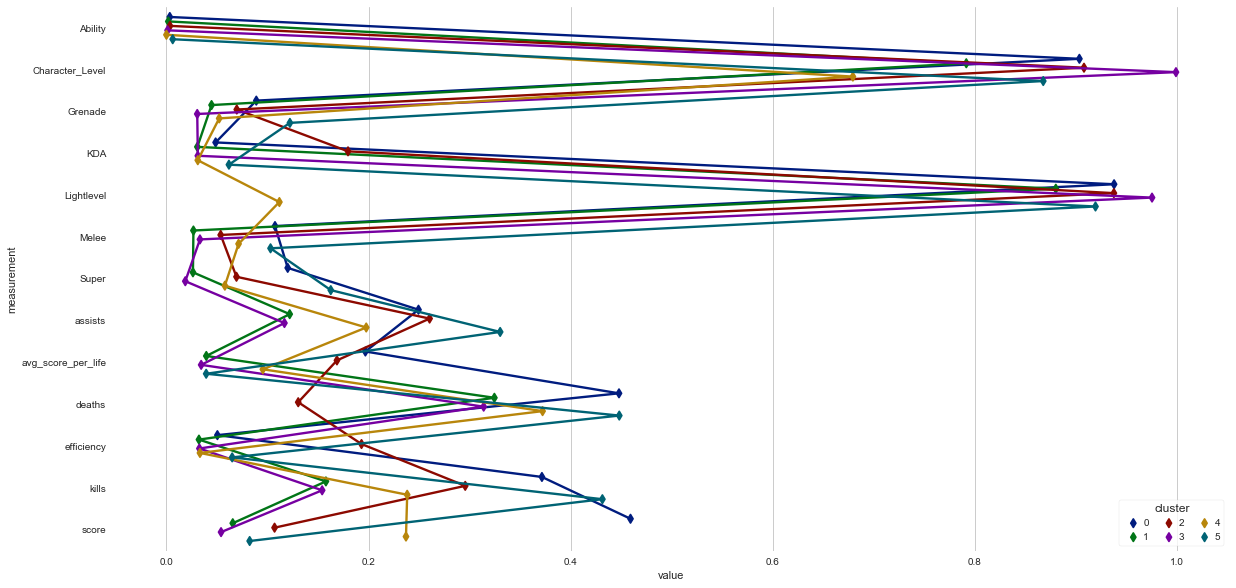

In [301]:
#Result Visualization 1
plt.rcParams["figure.figsize"] = (20,10)
plot_cluster_result(performance_df, 'cluster')

In [302]:
performance_df["cluster"].value_counts()

1    1455
3    1431
0     947
2     821
5     816
4      81
Name: cluster, dtype: int64

In [303]:
# split df into cluster groups
grouped = performance_df.groupby(['cluster'], sort=True)

# compute sums for every column in every group
means = grouped.mean()
means

,Ability,Character_Level,Grenade,KDA,Lightlevel,Melee,Super,assists,avg_score_per_life,deaths,efficiency,kills,score
cluster,,,,,,,,,,,,,
0,0.003322,0.903502,0.088945,0.048673,0.937841,0.107434,0.120020,0.249451,0.196888,0.447876,0.050433,0.371604,0.459260
1,0.001822,0.791583,0.044652,0.030593,0.880167,0.026707,0.026231,0.121990,0.039460,0.324551,0.032183,0.157813,0.065639
2,0.003475,0.908065,0.069605,0.179707,0.937647,0.053692,0.069315,0.260429,0.168737,0.130427,0.193047,0.295702,0.107009
3,0.001131,0.999090,0.030490,0.031070,0.975398,0.033169,0.018665,0.116778,0.034370,0.313946,0.032613,0.154103,0.054051
4,0.000000,0.679343,0.052205,0.031031,0.111770,0.071380,0.057826,0.197727,0.095441,0.372256,0.033162,0.238267,0.237066
5,0.006215,0.867738,0.122185,0.061837,0.919440,0.103020,0.162642,0.330271,0.039338,0.448148,0.065063,0.431447,0.082372


In [304]:
data1 = [go.Heatmap( z=means.values.tolist(), 
                   y=['Persona A', 'Persona B', 'Persona C', 'Persona D', 'Persona E', 'Persona F'],
                   x=['Ability', 'Character_Level', 'Grenade', 'KDA', 'Lightlevel', 'Melee',
       'Super', 'assists', 'avg_score_per_life', 'deaths', 'efficiency',
       'kills', 'score'
                     ],
                   colorscale='Viridis')]

#plotly.offline.iplot(data, filename='pandas-heatmap')

In [305]:
plot(data1)

'file:///Users/wangziwen/Desktop/Northwestern_Sem_3/destiny/sample_data/temp-plot.html'

### Only Cluster Weapon Class 

In [306]:
model = KMeans(n_clusters=6, n_init=30)
model.fit(weapon_df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=6, n_init=30, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [307]:
weapon_df = weapon_df.copy()
weapon_df['cluster'] = model.predict(weapon_df)

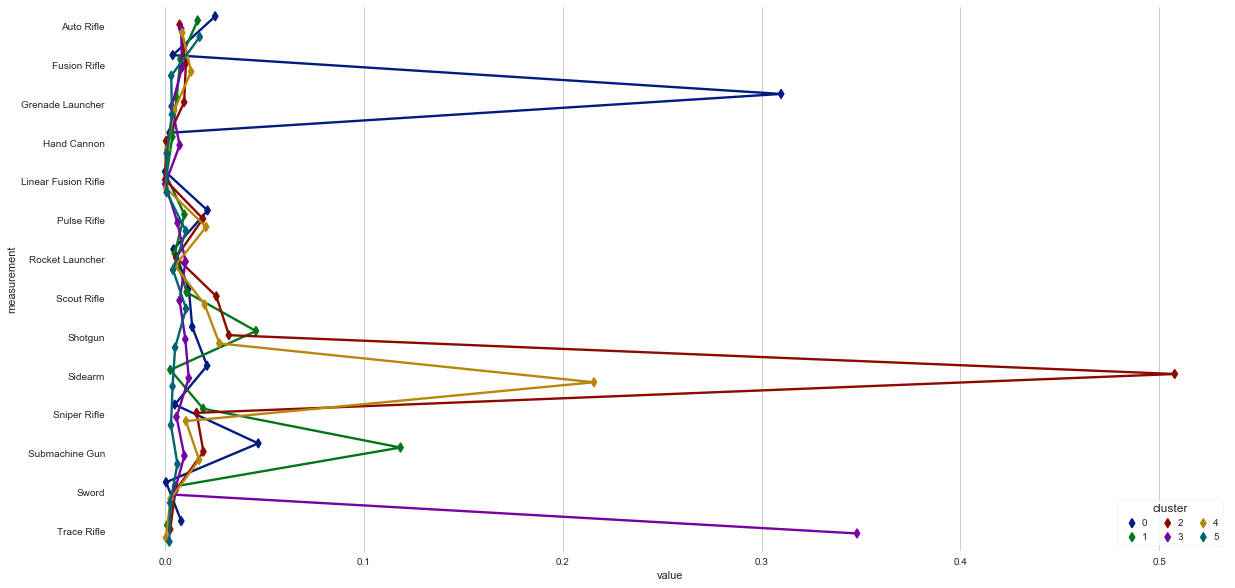

In [308]:
#Result Visualization 1
plt.rcParams["figure.figsize"] = (20,10)
plot_cluster_result(weapon_df, 'cluster')

In [309]:
weapon_df["cluster"].value_counts()

5    3668
1     768
4     545
0     192
2     190
3     188
Name: cluster, dtype: int64

In [310]:
# split df into cluster groups
grouped = weapon_df.groupby(['cluster'], sort=True)

# compute sums for every column in every group
means_2 = grouped.mean()
means_2

,Auto Rifle,Fusion Rifle,Grenade Launcher,Hand Cannon,Linear Fusion Rifle,Pulse Rifle,Rocket Launcher,Scout Rifle,Shotgun,Sidearm,Sniper Rifle,Submachine Gun,Sword,Trace Rifle
cluster,,,,,,,,,,,,,,
0,0.025156,0.003806,0.309804,0.002237,0.000000,0.021317,0.004237,0.011839,0.013590,0.021079,0.004819,0.046829,0.000446,0.008070
1,0.016323,0.007619,0.005783,0.003594,0.000651,0.009663,0.004806,0.010793,0.045658,0.002587,0.019147,0.118366,0.004964,0.001058
2,0.007279,0.010421,0.009539,0.000476,0.000000,0.018978,0.005498,0.025726,0.032057,0.507784,0.015789,0.019225,0.005163,0.002522
3,0.008035,0.008490,0.003277,0.007290,0.000000,0.006230,0.010246,0.007241,0.010135,0.011859,0.005699,0.009659,0.004255,0.347992
4,0.008575,0.013037,0.004472,0.001071,0.000459,0.020587,0.004981,0.019873,0.027288,0.215677,0.010448,0.017050,0.002752,0.000382
5,0.017360,0.003053,0.003374,0.000768,0.000750,0.010424,0.003934,0.010500,0.004986,0.003702,0.002924,0.006167,0.002503,0.002075


In [311]:
data2 = [go.Heatmap( z=means_2.values.tolist(), 
                   y=['Persona A', 'Persona B', 'Persona C', 'Persona D', 'Persona E', 'Persona F'],
                   x=['Auto Rifle', 'Fusion Rifle', 'Grenade Launcher',
       'Hand Cannon', 'Linear Fusion Rifle', 'Pulse Rifle', 'Rocket Launcher',
       'Scout Rifle', 'Shotgun', 'Sidearm', 'Sniper Rifle', 'Submachine Gun',
       'Sword', 'Trace Rifle'
                     ],
                   colorscale='Viridis')]

#plotly.offline.iplot(data, filename='pandas-heatmap')

In [312]:
plot(data2,image_filename='weapon_cluster')

'file:///Users/wangziwen/Desktop/Northwestern_Sem_3/destiny/sample_data/temp-plot.html'

### In terms of performance cluster, the light level and character level are highly correlated. Try clustering without these two features 

In [313]:
performance_df_2= norm_player_feature_df[['Ability', 'Grenade', 'KDA','Melee',
       'Super', 'assists', 'avg_score_per_life', 'deaths', 'efficiency',
       'kills', 'score']]

In [314]:
model = KMeans(n_clusters=6, n_init=30)
model.fit(performance_df_2)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=6, n_init=30, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [315]:
performance_df_2 = performance_df_2.copy()
performance_df_2['cluster'] = model.predict(performance_df_2)

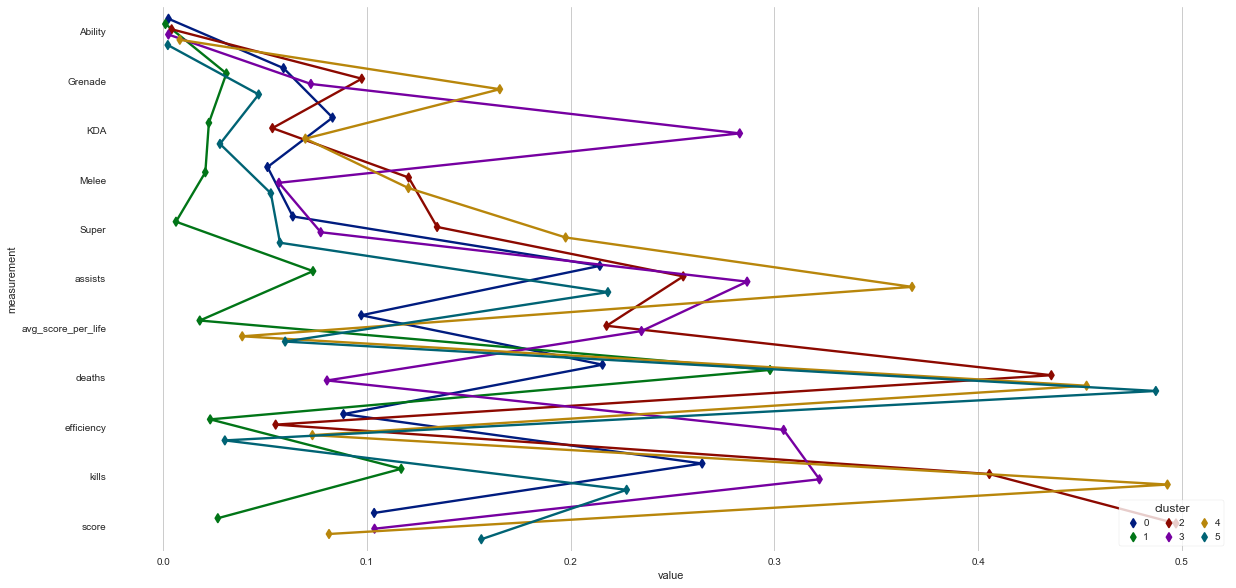

In [316]:
#Result Visualization 1
plt.rcParams["figure.figsize"] = (20,10)
plot_cluster_result(performance_df_2, 'cluster')

In [317]:
performance_df_2["cluster"].value_counts()

1    1731
0    1271
5     975
2     762
4     500
3     312
Name: cluster, dtype: int64

In [318]:
# split df into cluster groups
grouped = performance_df_2.groupby(['cluster'], sort=True)

# compute sums for every column in every group
means_3 = grouped.mean()
means_3

,Ability,Grenade,KDA,Melee,Super,assists,avg_score_per_life,deaths,efficiency,kills,score
cluster,,,,,,,,,,,
0,0.002577,0.059067,0.083109,0.051182,0.063606,0.214308,0.097219,0.215637,0.088474,0.264536,0.103531
1,0.001071,0.031005,0.022400,0.020659,0.006258,0.073522,0.017933,0.297844,0.023058,0.116824,0.026797
2,0.004128,0.097459,0.053610,0.120459,0.134431,0.255240,0.217624,0.435929,0.055174,0.405506,0.497088
3,0.002537,0.072479,0.282971,0.056782,0.077303,0.286598,0.234739,0.080394,0.304524,0.322101,0.103723
4,0.008143,0.165202,0.069775,0.120351,0.197504,0.367570,0.038782,0.453217,0.073234,0.492915,0.081370
5,0.002256,0.046857,0.027843,0.052818,0.057292,0.218271,0.059844,0.487209,0.030246,0.227472,0.156146


In [319]:
data3 = [go.Heatmap( z=means_3.values.tolist(), 
                   y=['Persona A', 'Persona B', 'Persona C', 'Persona D', 'Persona E', 'Persona F'],
                   x=['Ability', 'Grenade', 'KDA', 'Melee',
       'Super', 'assists', 'avg_score_per_life', 'deaths', 'efficiency',
       'kills', 'score'
                     ],
                   colorscale='Viridis')]

#plotly.offline.iplot(data, filename='pandas-heatmap')

In [320]:
plot(data3)

'file:///Users/wangziwen/Desktop/Northwestern_Sem_3/destiny/sample_data/temp-plot.html'